# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.

How accurately can you predict treatment?

### Importing libraries

In [47]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# fancy graphs
import seaborn
import matplotlib.pyplot as plt

In [1]:
# Download data 
# (not required if running locally and have previously downloaded data)

download_required = False

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'        
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)
    
# Load data    
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)
# Show data
data.head()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,...,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,2.0,0.0,4.0,1.0,4.0,0.0,1.0,2.0,2.0,1.0


Let's have a look at general correlation between all of the features

<AxesSubplot: >

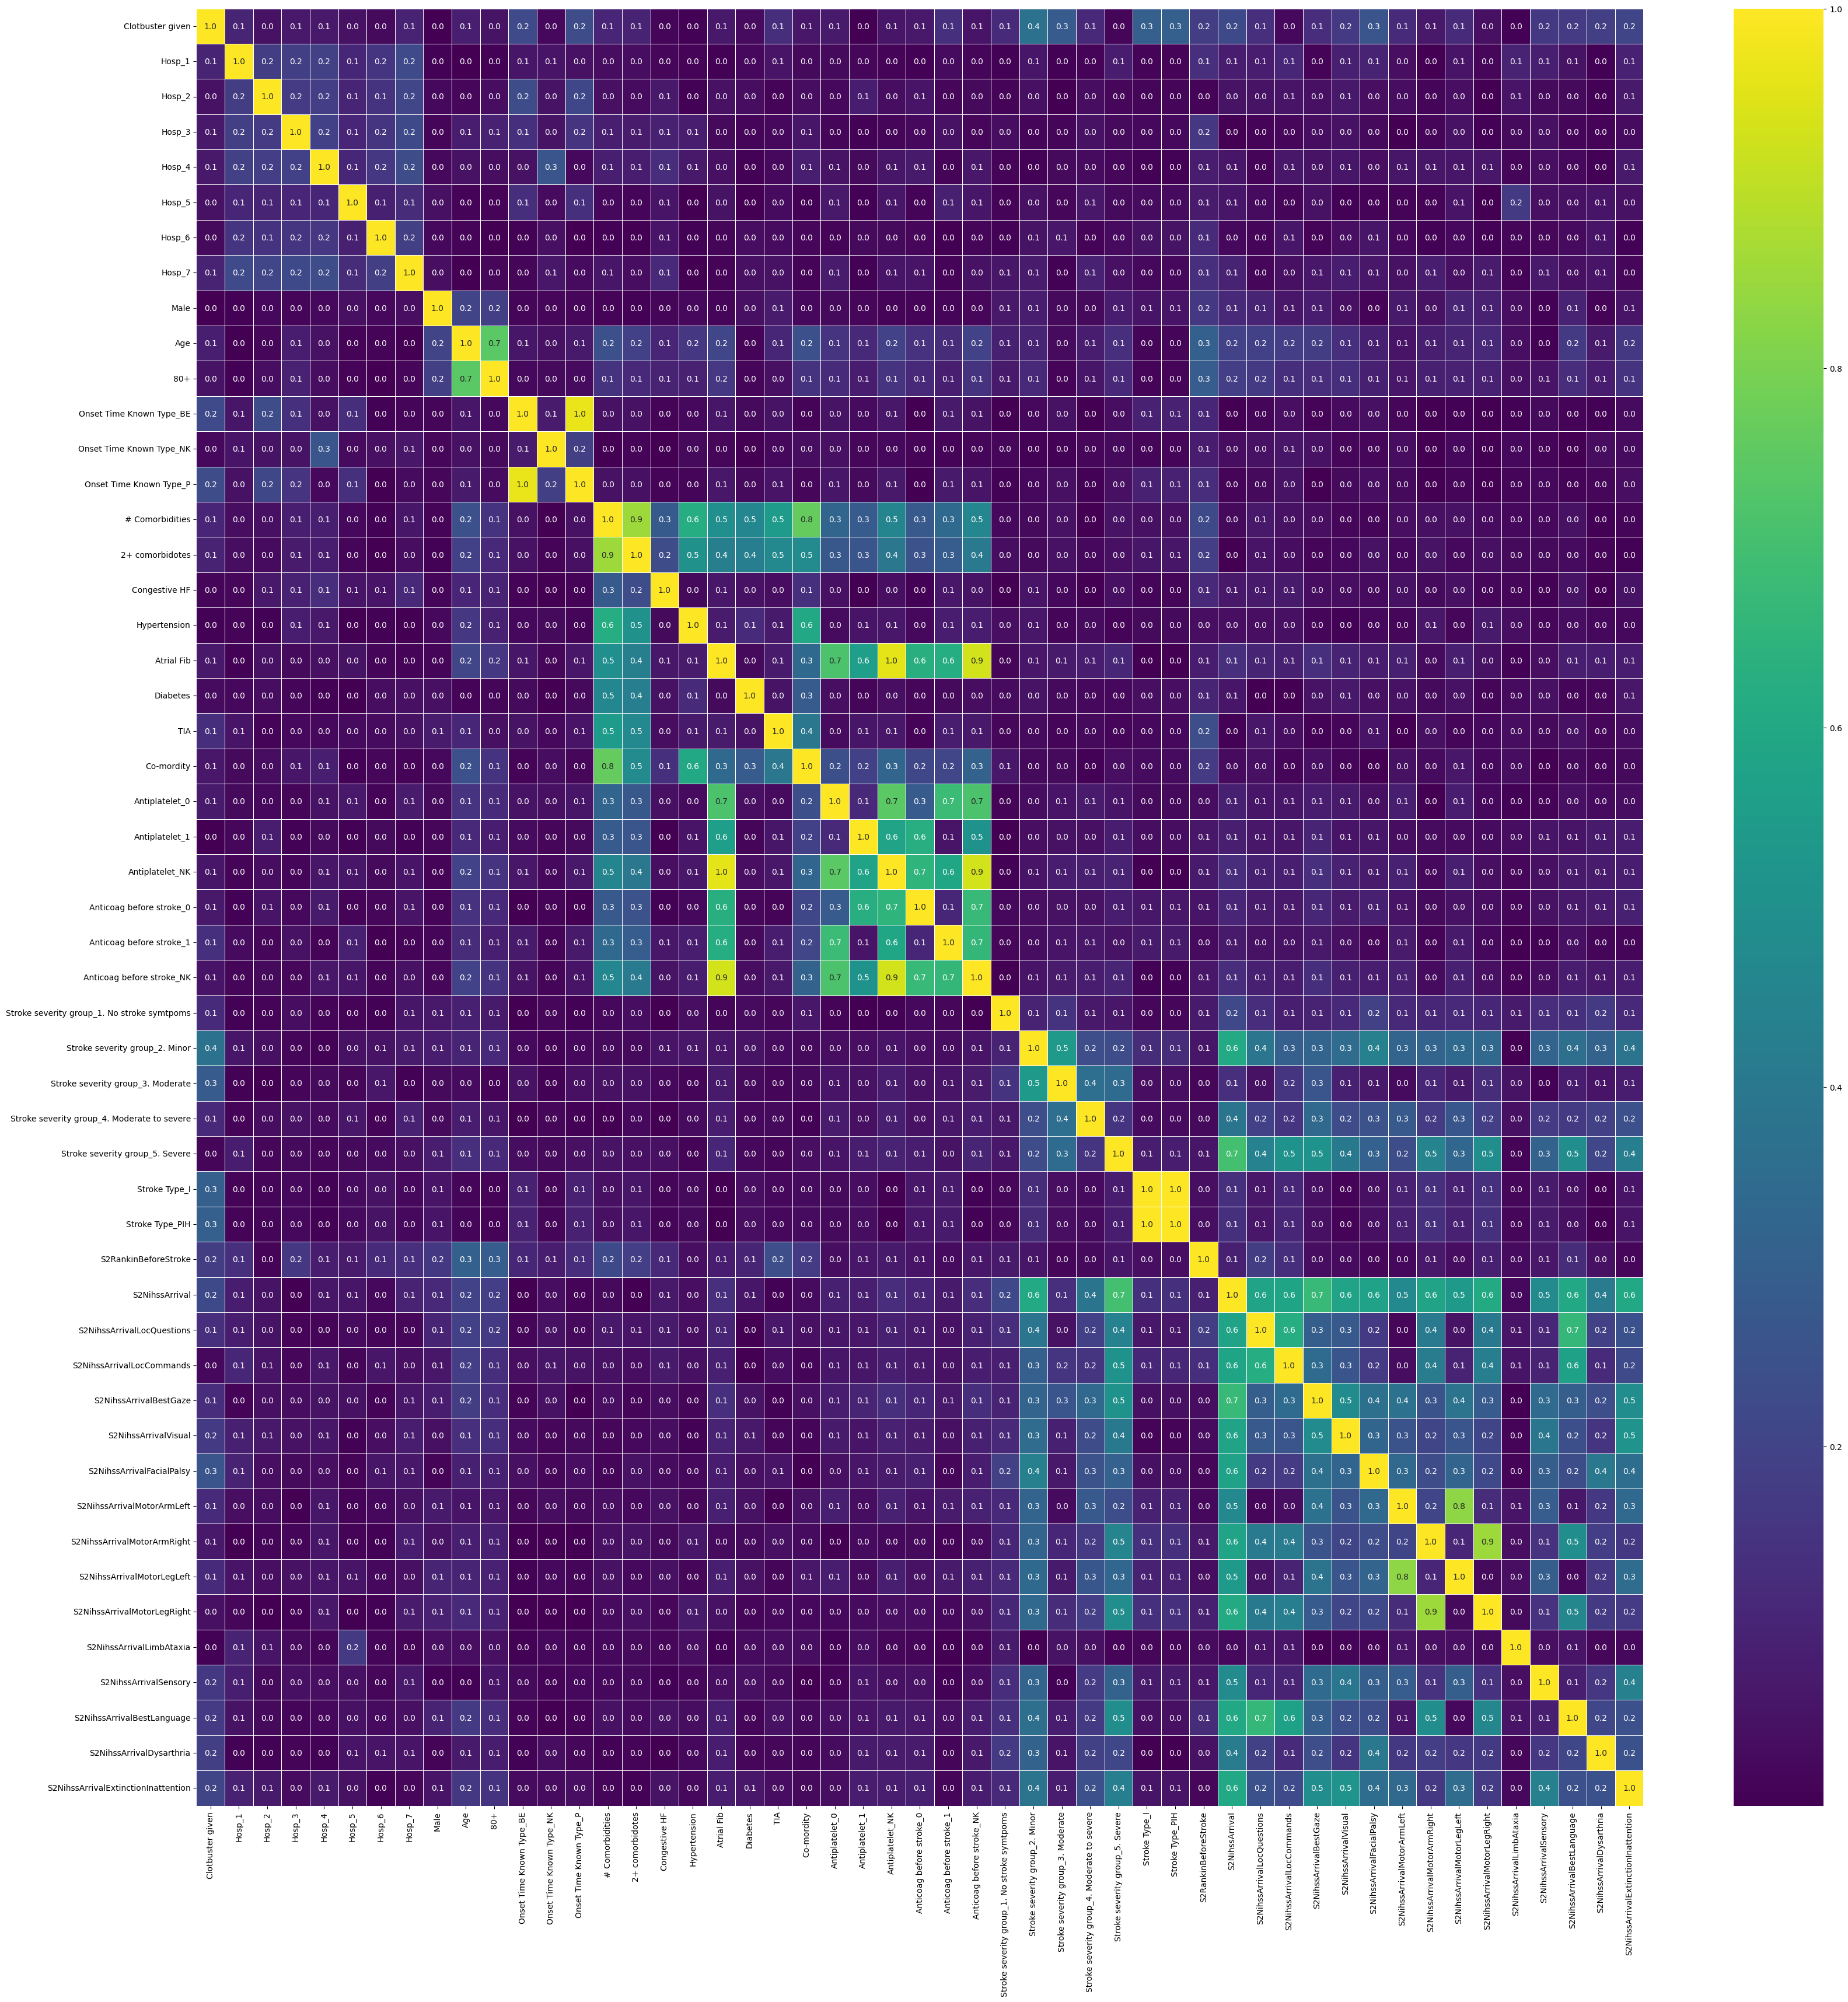

In [43]:
fig, ax = plt.subplots(1,1, figsize=(40, 40))

seaborn.heatmap(data.corr().abs(), yticklabels=True, ax=ax, annot=True, fmt='.1f', linewidth=.5, cmap='viridis')

# Some data checking

First we should have a little skim through just to see the layout of the land and whether some changes are needed (normalisation and what not)

In [2]:
data.describe()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,...,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,0.403330,0.159506,0.142320,0.154672,0.165414,0.055854,0.113319,0.208915,0.515575,74.553706,...,1.114930,1.002148,0.963480,0.963480,0.910849,0.216971,0.610097,0.944146,0.739527,0.566595
std,0.490698,0.366246,0.349472,0.361689,0.371653,0.229701,0.317068,0.406643,0.499892,12.280576,...,0.930527,1.479211,1.441594,1.406501,1.380606,0.522643,0.771932,1.121379,0.731083,0.794000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [6]:
data.isna().sum()

Clotbuster given                               0
Hosp_1                                         0
Hosp_2                                         0
Hosp_3                                         0
Hosp_4                                         0
Hosp_5                                         0
Hosp_6                                         0
Hosp_7                                         0
Male                                           0
Age                                            0
80+                                            0
Onset Time Known Type_BE                       0
Onset Time Known Type_NK                       0
Onset Time Known Type_P                        0
# Comorbidities                                0
2+ comorbidotes                                0
Congestive HF                                  0
Hypertension                                   0
Atrial Fib                                     0
Diabetes                                       0
TIA                 

## Separating between features & labels and train & test data sets

In [7]:
y = data['Clotbuster given']
X = data.drop('Clotbuster given', axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

> As an aside, we're checking with MinMaxing to see what fits better

In [48]:
def normalize_data(X_train, X_test):
    sc = MinMaxScaler()
    
    sc.fit(X_train)
    
    train_norm = sc.transform(X_train)
    test_norm = sc.transform(X_test)
    
    return train_norm, test_norm

X_train_norm, X_test_norm = normalize_data(X_train, X_test)

norm_model = LogisticRegression()
norm_model.fit(X_train_norm, y_train)

y_pred_train_norm = norm_model.predict(X_train_norm)
y_pred_test_norm = norm_model.predict(X_test_norm)

accuracy_train_norm = np.mean(y_pred_train_norm == y_train)
accuracy_test_norm = np.mean(y_pred_test_norm == y_test)

print ('Accuracy of predicting training data =', accuracy_train_norm)
print ('Accuracy of predicting test data =', accuracy_test_norm)
    

### Training and testing the model

In [13]:
X_train_std, X_test_std = standardise_data(X_train, X_test)

In [14]:
model = LogisticRegression()
model.fit(X_train_std,y_train)

LogisticRegression()

In [15]:
# Predict training and test set labels
y_pred_train = model.predict(X_train_std)
y_pred_test = model.predict(X_test_std)

In [16]:
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print ('Accuracy of predicting training data =', accuracy_train)
print ('Accuracy of predicting test data =', accuracy_test)

Accuracy of predicting training data = 0.8080229226361032
Accuracy of predicting test data = 0.8283261802575107


### Seeing what features most influenced survivability

In [29]:
co_eff = model.coef_[0]

co_eff_df = pd.DataFrame() # create empty DataFrame
co_eff_df['feature'] = list(X) # Get feature names from X
co_eff_df['co_eff'] = co_eff
co_eff_df['abs_co_eff'] = np.abs(co_eff)

In [52]:
co_eff_df.sort_values('abs_co_eff', ascending=False)

,feature,co_eff,abs_co_eff
32,Stroke Type_I,1.138332,1.138332
33,Stroke Type_PIH,-1.138332,1.138332
28,Stroke severity group_2. Minor,-0.746532,0.746532
35,S2NihssArrival,-0.700240,0.700240
29,Stroke severity group_3. Moderate,0.526097,0.526097
34,S2RankinBeforeStroke,-0.495536,0.495536
47,S2NihssArrivalBestLanguage,0.445437,0.445437
40,S2NihssArrivalFacialPalsy,0.300168,0.300168
10,Onset Time Known Type_BE,-0.297909,0.297909
36,S2NihssArrivalLocQuestions,0.286445,0.286445


<AxesSubplot: ylabel='feature'>

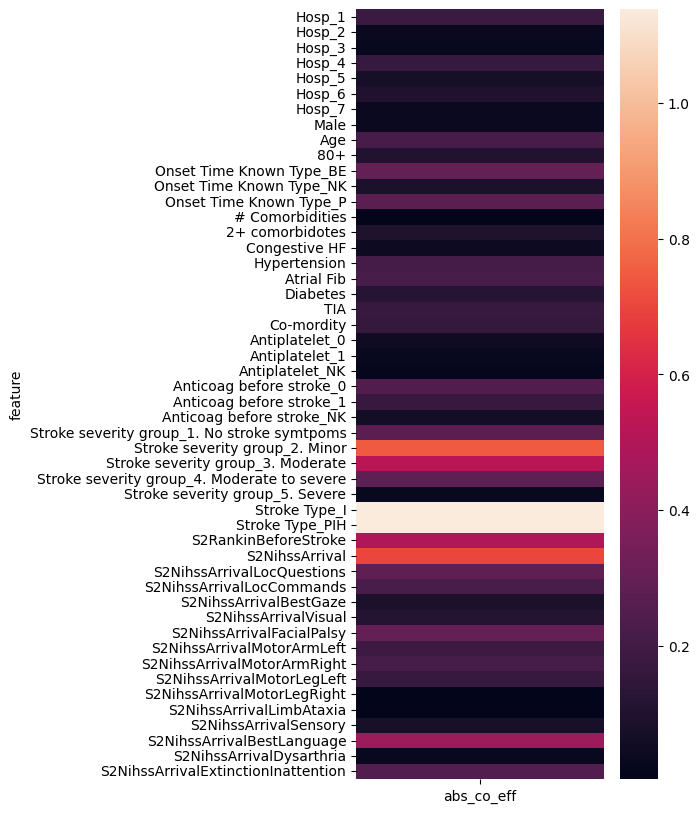

In [33]:
fig, ax = plt.subplots(1,1, figsize=(4,10))

z = co_eff_df.drop('co_eff', axis=1)
z.set_index('feature', inplace=True)

seaborn.heatmap(z, yticklabels=True, ax=ax)

In [58]:
# Show first ten predicted classes
classes = model.predict(X_test_std)
print(classes[0:10])
# Show first ten predicted probabilities 
# (note how the values relate to the classes predicted above)
probabilities = model.predict_proba(X_test_std)
print(probabilities[0:10])

[1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
[[0.16570755 0.83429245]
 [0.46208922 0.53791078]
 [0.81630644 0.18369356]
 [0.17863663 0.82136337]
 [0.9861875  0.0138125 ]
 [0.11254078 0.88745922]
 [0.03499705 0.96500295]
 [0.98832576 0.01167424]
 [0.94864571 0.05135429]
 [0.76123533 0.23876467]]


In [55]:
from sklearn import svm
### SVM Model
model_svm = svm.SVC()
model_svm.fit(X_train_std, y_train)

# Predict training and test set labels
y_pred_train_svm = model_svm.predict(X_train_std)
y_pred_test_svm = model_svm.predict(X_test_std)

#Model Accuracy Check
accuracy_train_svm = np.mean(y_pred_train_svm == y_train)
accuracy_test_svm = np.mean(y_pred_test_svm == y_test)

print ('Accuracy of predicting training data =', accuracy_train_svm)
print ('Accuracy of predicting test data =', accuracy_test_svm)

Accuracy of predicting training data = 0.8825214899713467
Accuracy of predicting test data = 0.8326180257510729
